# Example 1

## Building an ePSF for the reference image

In [1]:
from musepsf.image import Image
from astropy.coordinates import SkyCoord
import astropy.units as u

refname = 'NGC253_Rc_flux_wcomb.fits'

wfi = Image(refname, input_dir='./', output_dir='./')
center = SkyCoord.from_name('NGC253')

INFO: Query finished. [astroquery.utils.tap.core]
Selecting stars between 12 and 20 G mag


EPSFBuilder (50 maxiters):   0%|          | 0/50 [00:00<?, ?it/s]

EPSFBuilder converged after 5 iterations (of 50 maximum iterations)

249 stars were used to build this PSF


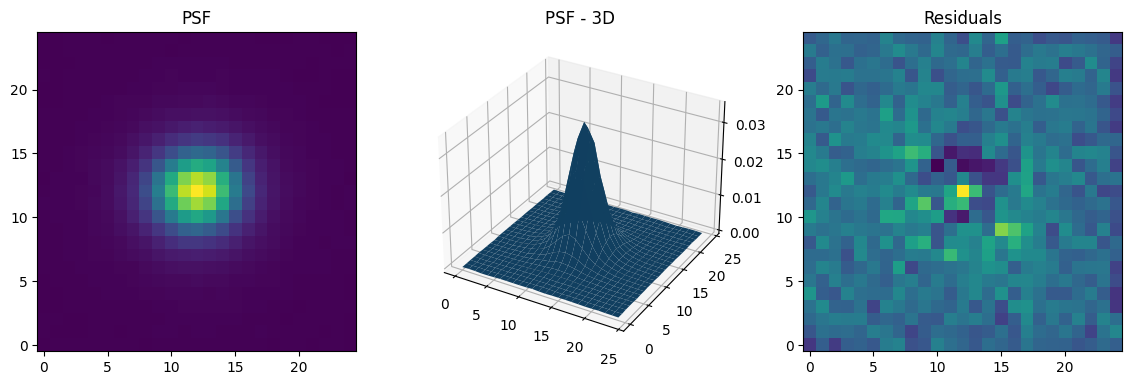

In [2]:
wfi.mask_galaxy(center, 25*u.arcmin, 6*u.arcmin, 51*u.deg)
wfi.build_psf(center, 12, 20, 15*u.arcmin, 25)

If the PSF already exist, it can be opened with the following command

In [3]:
wfi.open_psf('NGC253_Rc_flux_wcomb.psf.fits')

## Measuring the MUSE PSF

The first step is to open the MUSE image and convert the reference image to the same units as the MUSE one

In [4]:
from musepsf.musepsf import MUSEImage

musename = 'NGC0253_IMAGE_FOV_WCS_OB020_WFI_BB_2022-09-19T07:04:39_0001.fits'

muse = MUSEImage(musename, input_dir='./', output_dir='./')

In [5]:
equivalency = u.spectral_density(6483.58 * u.AA)

wfi.convert_units(muse.units, equivalency=equivalency)

Updating the units from uJy to 1e-20 erg / (Angstrom cm2 s)


At this point, it is possible to launch the method `measure_psf` to finally measure the FWHM of the MUSE PSF. However, be aware that the reprojection performed during `measure_psf` will modify the reference image, since only the part of the image relevant for the cross-convolution will be preserved. In case more than one MUSE image has to be processed with the same reference image, it is suggested to perform a deepcopy of the reference image before using it in `measure_psf`. 

In [6]:
from copy import deepcopy

newwfi = deepcopy(wfi)

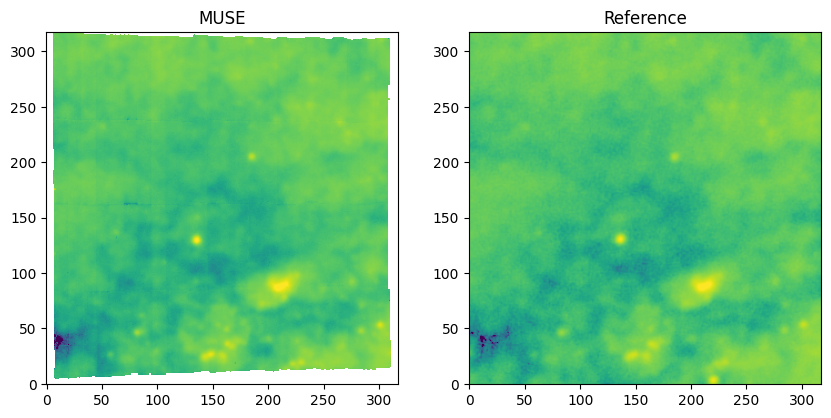

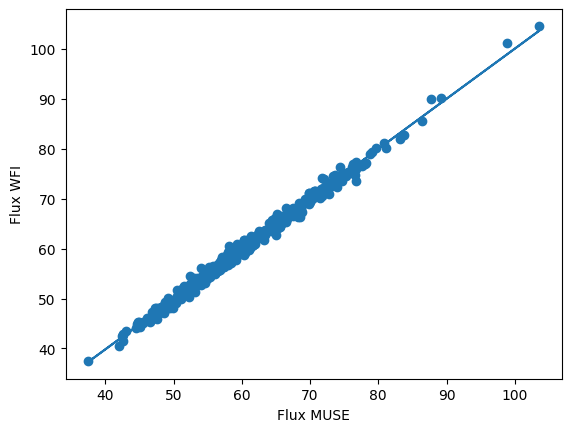


Residual flux correction.
Gamma: 1.004, b: -0.358
Correction applied.


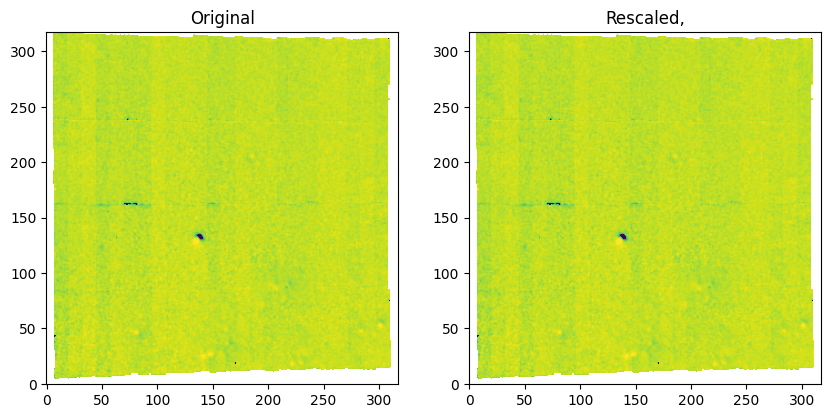

NOAO data, using alpha = 2.8
Performing the fit
Fit completed
Measured FWHM = 0.7284134895651087


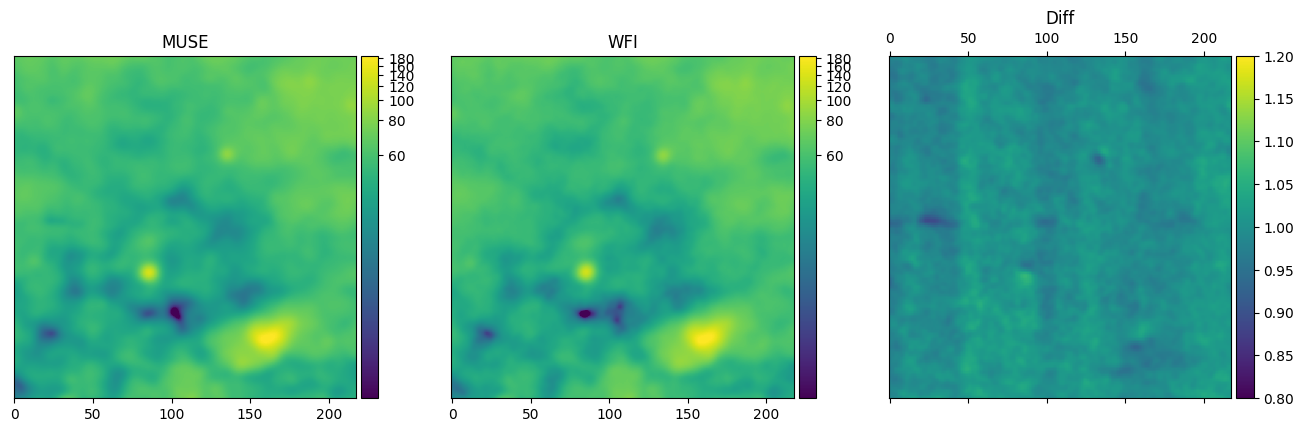

In [7]:

muse.measure_psf(reference=newwfi, plot=True, save=True, show=True, edge=50)

It is important to remove the edge of the image, to exclude from the minimization the regions where edges effects could be dominating.

From some test, a value of 50 seems to produce a good enough result

It is possible to also fit the Moffat power index together with the FWHM. However, keep in mind that the results may be unreliable

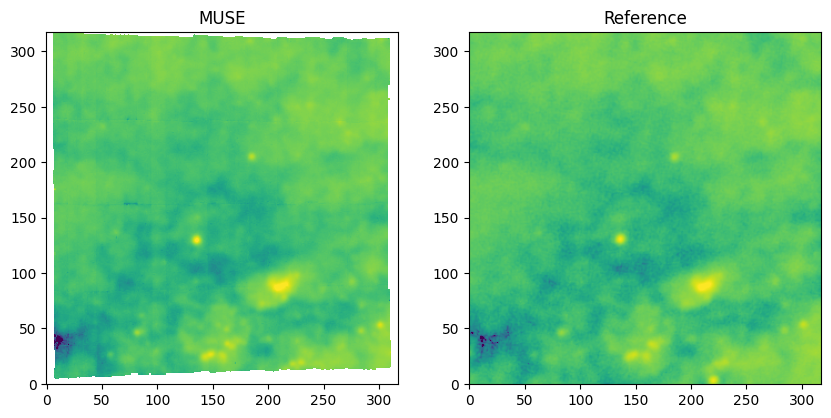

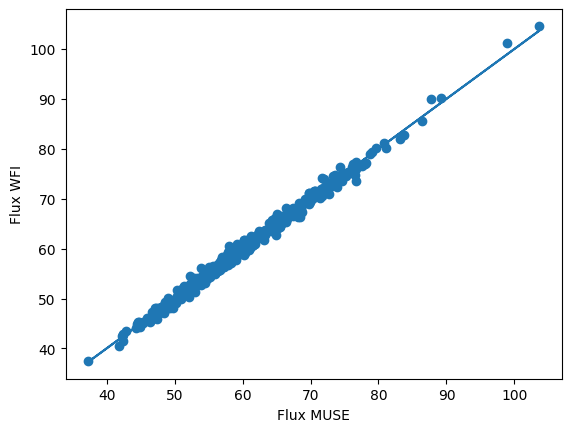


Residual flux correction.
Gamma: 1.000, b: 0.000
Correction applied.


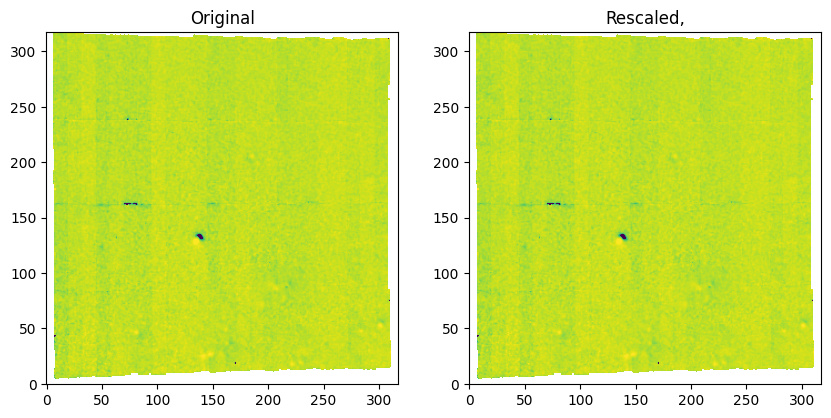

NOAO data, using alpha = 2.8
Performing the fit
Fit completed
Measured FWHM = 0.9378274497613258
Measured alpha = 6.759119902699373


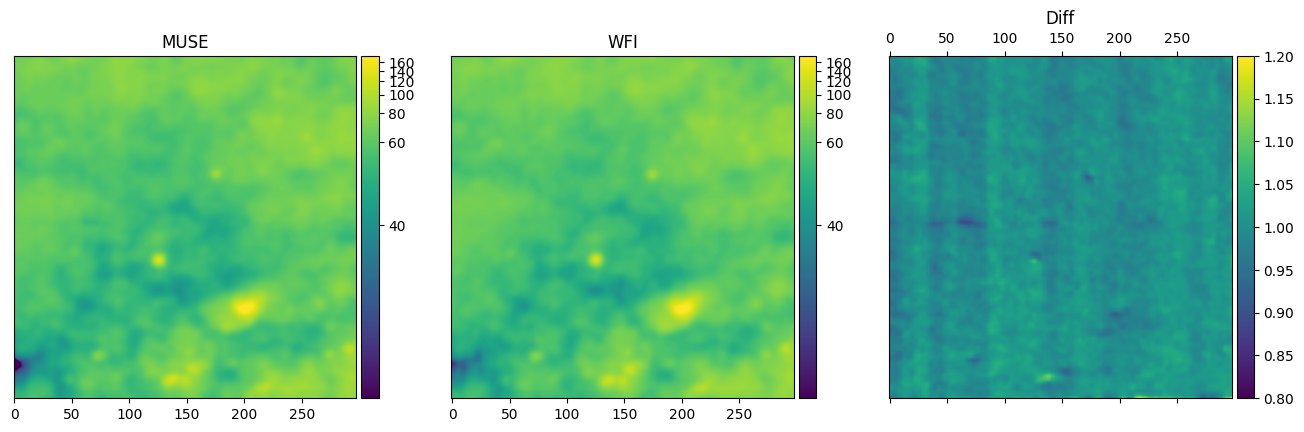

In [8]:
newwfi = deepcopy(wfi)

muse.measure_psf(reference=newwfi, fit_alpha=True, plot=True, save=True, show=True)

The final results are accessible via the `muse.best_fit` attribute

In [9]:
muse.best_fit

array([0.93782745, 6.7591199 ])